This notebook contains a line-by-line display of the figures outlined in the story.

In [1]:
import pandas as pd

In [2]:
ert = pd.read_csv("../../projects/state-of-democracy/data/ert-dataset.csv")
vdem = pd.read_csv("../../projects/state-of-democracy/data/Country_Year_V-Dem_Core_CSV_v12/V-Dem-CY-Core-v12.csv")

In [3]:
# ert = pd.read_csv("../data/ert-dataset.csv")
# vdem = pd.read_csv("../data/Country_Year_V-Dem_Core_CSV_v12/V-Dem-CY-Core-v12.csv")

_Brazil is one of 12 countries where domestic democratic systems are tilting toward autocracy, according to data published by Varieties of Democracy (V-Dem), an independent research institute based at the University of Gothenburg._

In [4]:
# Removes democratization processes
ert = ert[~ert.aut_ep_id.isna()].reset_index()

In [5]:
 # Keep only those in which the process started in a democracy
ert = ert[ert.aut_ep_prch==1]

In [6]:
# Keeps only one entry for each episode, since they currently have one entry per year
ert = ert.drop_duplicates(subset='aut_ep_id', keep='last').reset_index()

In [7]:
# How many are still ongoing?
# We use the standard parameters of the dataset
# Code 6 == 'Uncertain'
ert.aut_ep_outcome.value_counts()

1    62
6    12
4     5
2     2
Name: aut_ep_outcome, dtype: int64

_"The other 11 countries span the globe: Poland, Niger, Indonesia, Botswana, Guatemala, Tunisia, Croatia, the Czech Republic, Guyana, Mauritius and Slovenia."_

In [8]:
# List of country ids for uncertain autocratization episodes
ert[ert.aut_ep_outcome==6].country_text_id.unique()

array(['POL', 'BRA', 'IDN', 'NER', 'BWA', 'GTM', 'TUN', 'HRV', 'CZE',
       'GUY', 'MUS', 'SVN'], dtype=object)

In [9]:
# Count of countries
ert[ert.aut_ep_outcome==6].country_text_id.unique().shape

(12,)

_In addition to these 12 countries where crises of democracy are still unfolding, V-Dem has identified another 17 that have lost the fight in the past decade alone — including Turkey, the Philippines and Hungary._

In [10]:
# Code 1 == democratic breakdown
# This means 18 unique episodes
ert[(ert.year > 2010)].aut_ep_outcome.value_counts()

1    18
6    12
4     4
Name: aut_ep_outcome, dtype: int64

In [11]:
# But this happened on 17 countries!
ert[(ert.year > 2010) & (ert.aut_ep_outcome==1)].country_text_id.unique().shape

(17,)

In [12]:
# Mali had two autocratization episodes, in a sucession of coups
ert[(ert.year > 2010) & (ert.aut_ep_outcome==1)].country_text_id

4     SLV
6     BOL
8     MLI
9     MLI
14    IND
17    PHL
20    BEN
21    BFA
23    NIC
27    ZMB
28    CIV
39    MDV
41    PNG
45    TUR
47    UKR
73    MKD
77    SRB
80    HUN
Name: country_text_id, dtype: object

_In countries such as Russia and Venezuela, authoritarian rule has been entrenched and civil liberties further curtailed._

In [13]:
# Reads a clean file again
ert_aut = pd.read_csv("../../projects/state-of-democracy/data/ert-dataset.csv")

In [14]:
# Keep only those in which the process DID NOT start in a democracy
ert_aut = ert_aut[ert_aut.aut_ep_prch==0]

In [15]:
# Keeps only one entry for each episode, since they currently have one entry per year
ert_aut = ert_aut.drop_duplicates(subset='aut_ep_id', keep='last').reset_index()

In [16]:
# How many ended in autocratic regression? (code 5
ert_aut.aut_ep_outcome.value_counts()

5    147
Name: aut_ep_outcome, dtype: int64

In [17]:
# Where has this happened in the last decade?
ert_aut[(ert_aut.year >= 2011) & (ert_aut.aut_ep_outcome==5)].country_name.unique()

array(['Burma/Myanmar', 'Russia', 'Egypt', 'Yemen', 'Bangladesh',
       'Pakistan', 'Afghanistan', 'Tanzania', 'Thailand', 'Venezuela',
       'Cambodia', 'Nepal', 'Burundi', 'Guinea-Bissau', 'Libya', 'Togo',
       'Bahrain', 'Comoros'], dtype=object)

_Though far more countries can now be called democratic than could have 100 years ago, the process of democratization stalled globally in the early 2000s._ 

In [18]:
# Share of democracies in 1921
# 0 -> closed autocracy
# 1 -> electoral autocracy
# 2 -> electoral democracy
# 3 -> liberal democracy
vdem[(vdem.year==1921)].v2x_regime.value_counts(normalize=True)

0.0    0.695946
1.0    0.162162
2.0    0.081081
3.0    0.060811
Name: v2x_regime, dtype: float64

In [19]:
# Share of democracies in 2001
# 0 -> closed autocracy
# 1 -> electoral autocracy
# 2 -> electoral democracy
# 3 -> liberal democracy
vdem[(vdem.year==2001)].v2x_regime.value_counts(normalize=True)

1.0    0.299435
2.0    0.282486
3.0    0.214689
0.0    0.203390
Name: v2x_regime, dtype: float64

In [20]:
# Share of democracies in 2021
# 0 -> closed autocracy
# 1 -> electoral autocracy
# 2 -> electoral democracy
# 3 -> liberal democracy
vdem[(vdem.year==2021)].v2x_regime.value_counts(normalize=True)

1.0    0.335196
2.0    0.307263
3.0    0.189944
0.0    0.167598
Name: v2x_regime, dtype: float64

_The 179 countries classified by V-Dem are almost evenly split between electoral or closed autocracies and liberal or electoral democracies._

In [21]:
# 0 + 1 = ~50%
# 2 + 3 = ~50%
vdem[(vdem.year==2001)].v2x_regime.value_counts(normalize=True)

1.0    0.299435
2.0    0.282486
3.0    0.214689
0.0    0.203390
Name: v2x_regime, dtype: float64

_V-Dem has chronicled 81 periods of democratic decay in countries since 1900 — 50 of which happened have happened since 2000. In roughly 75% of cases, the crisis resulted in a complete transition to autocracy._ 

In [22]:
# Data was filtered above

# 0 - No autocratization
# 1 - Democratic breakdown
# 2 - Preempted democratic breakdown (turned autocratic for a brief while, without a 'founding election')
# 3 - Diminished democracy
# 4 - Averted regression
# 5 - Regressed autocracy
# 6 - Uncertain
ert.aut_ep_outcome.value_counts()

1    62
6    12
4     5
2     2
Name: aut_ep_outcome, dtype: int64

In [23]:
# Individual countries
ert.country_name.value_counts()

Niger          3
India          2
Ukraine        2
Sri Lanka      2
Mali           2
              ..
Austria        1
Ivory Coast    1
Belarus        1
South Korea    1
Suriname       1
Name: country_name, Length: 63, dtype: int64

In [24]:
# Episodes in this century
ert[ert.year >= 2001].aut_ep_id.unique().shape

(50,)

_His \[Rafael Correa's\] tenure, however, was also marked by diminishing liberties for media, opposition parties and civil society organizations._

In [25]:
# Selects ecuador only
ecu = vdem[vdem.country_text_id=='ECU']

In [26]:
# Shows only the Correa terms
ecu = ecu[(ecu.year >= 2007) & (ecu.year <= 2017)]

<AxesSubplot:xlabel='year'>

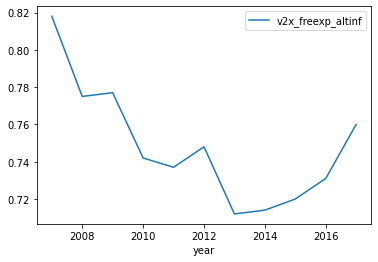

In [27]:
# Sub-index for freedom of expression and of media
ecu.plot(y='v2x_freexp_altinf', x='year')

<AxesSubplot:xlabel='year'>

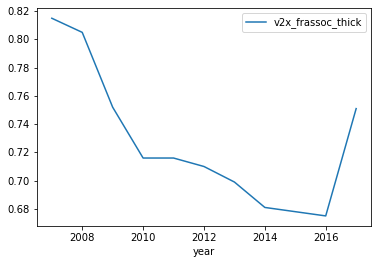

In [28]:
# Freedom of association
ecu.plot(y='v2x_frassoc_thick', x='year')

<AxesSubplot:xlabel='year'>

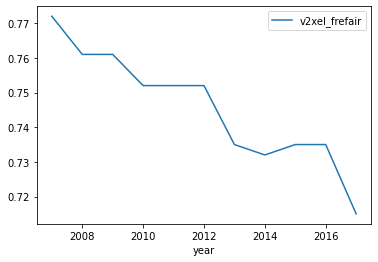

In [29]:
# Free and fair elections
ecu.plot(y='v2xel_frefair', x='year')